***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [370]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [371]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [372]:
df.Renda.max()
df.Renda.min()

classes = [df.Renda.min(), 1576, 3940, 11820, 19700, df.Renda.max()]
classes

[np.int64(0), 1576, 3940, 11820, 19700, np.int64(200000)]

### 2º Definir os labels das classes

In [373]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [374]:
frequencias = pd.value_counts (
    pd.cut(x = df.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True
           )
)
frequencias

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\3993730944.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencias = pd.value_counts (


Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [375]:
percentuais = pd.value_counts (
    pd.cut(x = df.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True
           ),
    normalize= True
)
percentuais

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\464116434.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentuais = pd.value_counts (


Renda
E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [376]:
final = pd.DataFrame(
    {'Frequência': frequencias, 
     'Percentual': percentuais
     })
final.sort_index(ascending = False)

,Frequência,Percentual
Renda,,
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

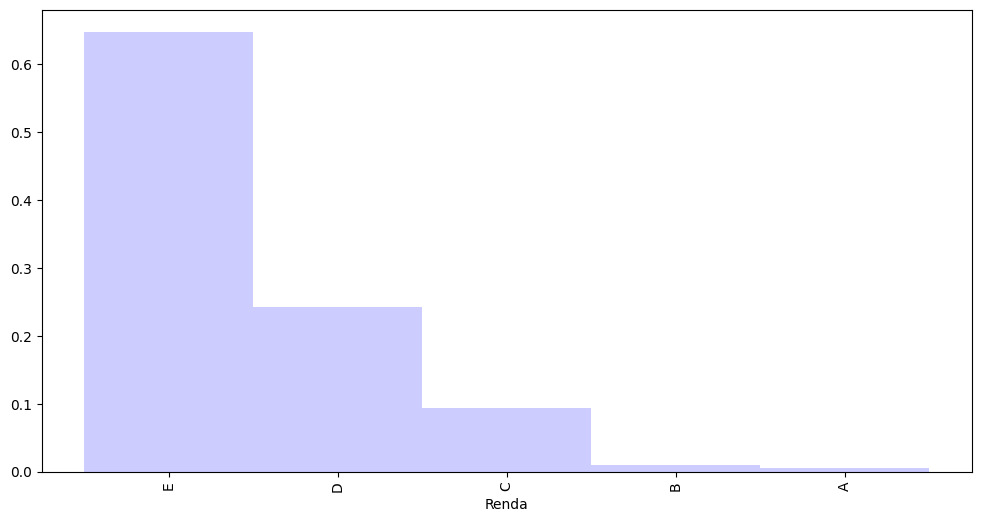

In [377]:
final['Percentual'].plot.bar(width= 1, color = 'blue', alpha = 0.2, figsize=(12, 6))

> ### Conclusões

A grande maioria da população (64%) vive em condições de até 2 Salários Mínimos, enquanto uma pequena parte da população (16%) vive com renda maior que 15 Salários Mínimos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

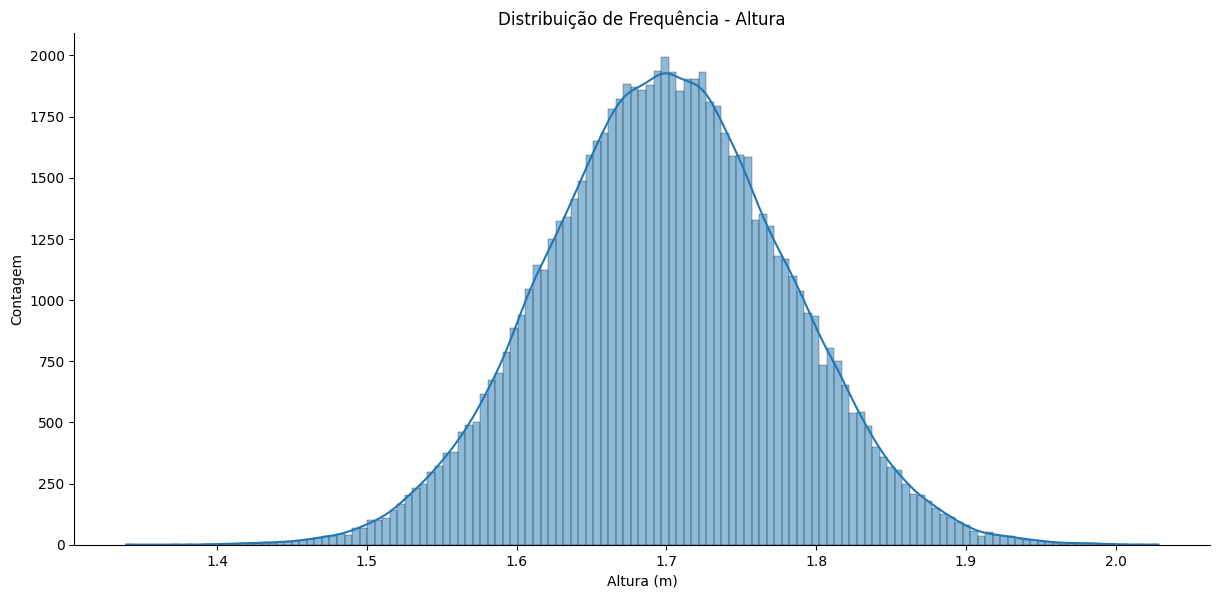

In [378]:
##variáveis quantitativas: idade, anos de estudo, renda e altura

graf_altura = sns.displot(df.Altura, kde = True)
graf_altura.set(title='Distribuição de Frequência - Altura')
graf_altura.figure.set_size_inches(14,6)
graf_altura.set_axis_labels('Altura (m)', 'Contagem')

A variável Altura possui distribuição simétrica, sendo a maioiria da população tendo altura por volta de 1,70m, enquantos os extremos são menos populosos.

In [379]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [380]:
df_filtrado = df[df["Renda"] > 15000]

df_filtrado["Renda"].value_counts(bins=10)

(14915.099, 33590.0]    553
(33590.0, 52080.0]       46
(52080.0, 70570.0]        7
(89060.0, 107550.0]       7
(70570.0, 89060.0]        4
(181510.0, 200000.0]      3
(107550.0, 126040.0]      1
(126040.0, 144530.0]      0
(144530.0, 163020.0]      0
(163020.0, 181510.0]      0
Name: count, dtype: int64

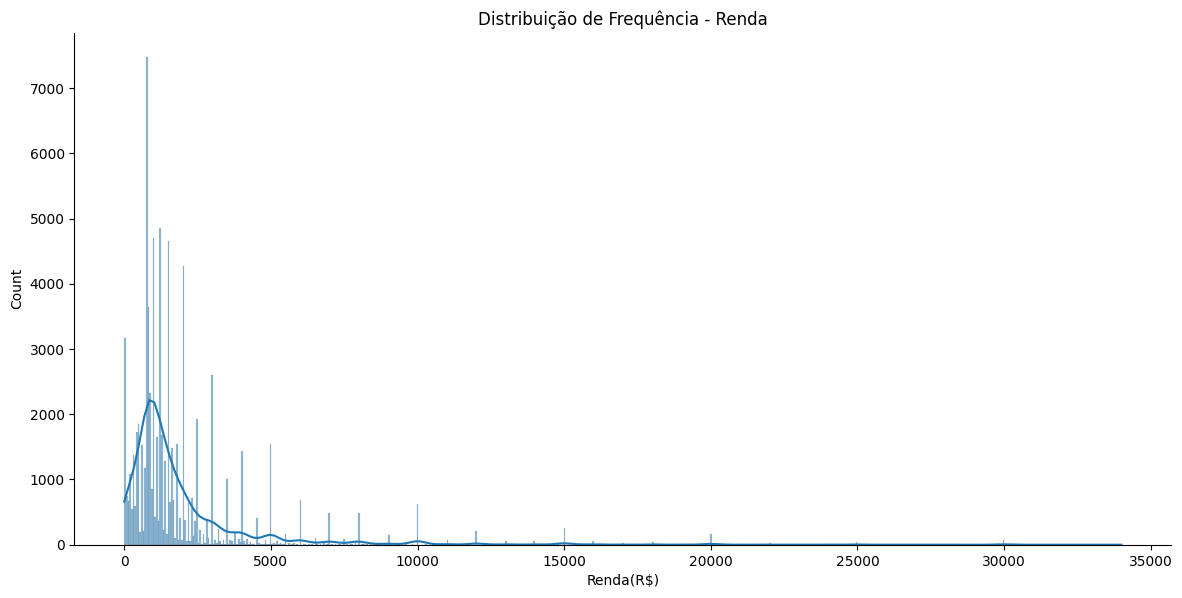

In [381]:
df_filtrado_2 = df[df["Renda"] < 35000]
graf_renda = sns.displot(df_filtrado_2.Renda, kde = True)
graf_renda.set(title = 'Distribuição de Frequência - Renda')
graf_renda.set_xlabels('Renda(R$)')
graf_renda.figure.set_size_inches(14,6)
graf_renda

Percebe-se que a distribuição da variável renda possui uma assimetria à direita, tendo a grande parte da sua população recebendo e torno de 2.500 R$, e pequena parte recebendo acima de 10.000 R$

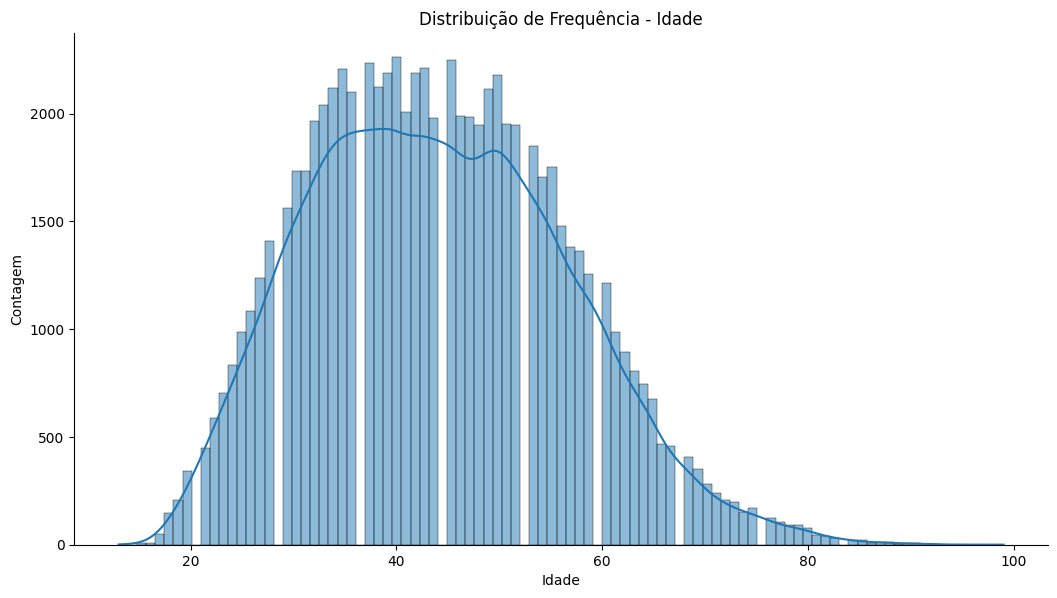

In [382]:
graf_idade = sns.displot(df.Idade, kde = True)
graf_idade.set(title = 'Distribuição de Frequência - Idade')
graf_idade.figure.set_size_inches(12,6)
graf_idade.set_ylabels('Contagem')

A idade representa uma distribuição simétrica, puxando um pouco para a direita, representando mais idosos do que crianças.

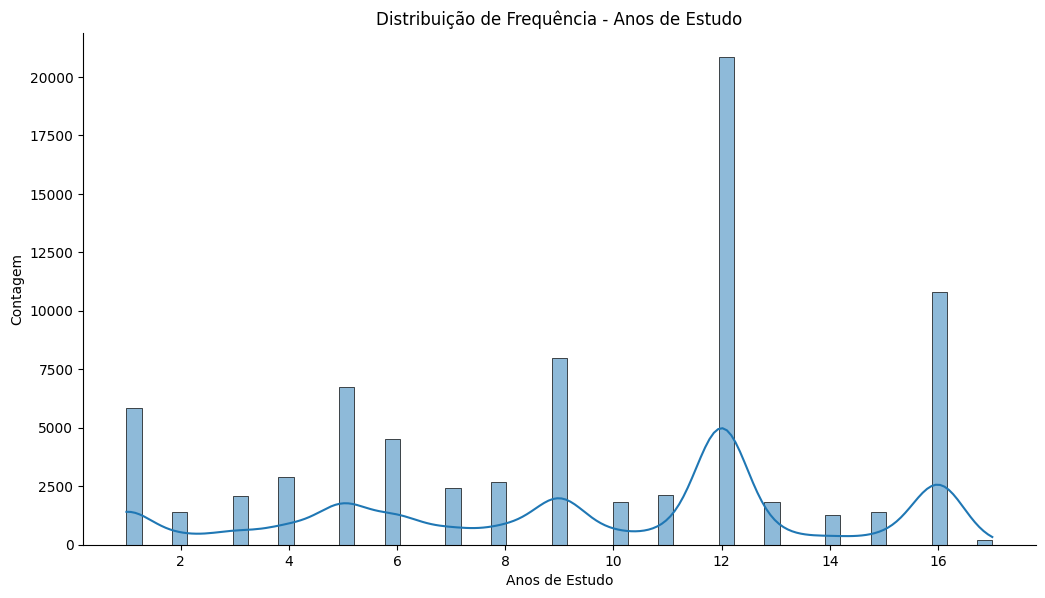

In [383]:
graf_estudo = sns.displot(df['Anos de Estudo'], kde = True)
graf_estudo.figure.set_size_inches(12,6)
graf_estudo.set(title='Distribuição de Frequência - Anos de Estudo')
graf_estudo.set_ylabels('Contagem')


A variávels Anos de Estudo representa uma distribuição assimétrica à esquerda, onde há uma predominância maior em anos de estudos maiores.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

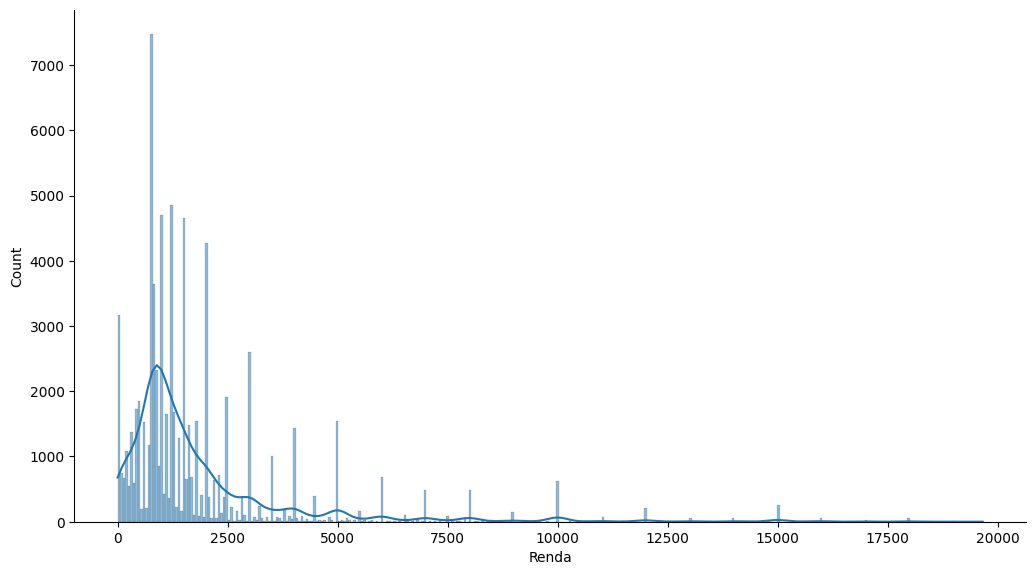

In [384]:
df_filtrado_renda = df[df["Renda"] < 20000]

hist_renda = sns.displot(df_filtrado_renda["Renda"], kde = True)
hist_renda.figure.set_size_inches(12,6)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [385]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [386]:
frequencia_cor_sexo = pd.crosstab(
                                df['Cor'], 
                                df['Sexo'])
frequencia_cor_sexo.rename(columns=sexo, inplace=True)
frequencia_cor_sexo.rename(index=cor, inplace=True)
frequencia_cor_sexo

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [387]:
percentual_cor_sexo = pd.crosstab(
                                df['Cor'],
                                df['Sexo'],
                                normalize= True) * 100
percentual_cor_sexo.rename(columns=sexo, inplace=True)
percentual_cor_sexo.rename(index=cor,inplace=True)
percentual_cor_sexo

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


> ### Conclusões

A grande maioria da população é parda e masculina, enquanto a menor parte da população é feminina índigena e amarela

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [388]:
df['Renda'].mean()

np.float64(2000.3831988547631)

### Obtenha a mediana

In [389]:
df['Renda'].median()

np.float64(1200.0)

### Obtenha a moda

In [390]:
df['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [391]:
mean = df['Renda'].mean()
desvio_medio_abs = abs(df['Renda'] - mean).mean()
desvio_medio_abs

np.float64(1526.4951371638058)

### Obtenha a variância

In [392]:
df['Renda'].var()

np.float64(11044906.006217021)

### Obtenha o desvio-padrão

In [393]:
df['Renda'].std()

np.float64(3323.3877303464037)

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [394]:
df_cross = pd.crosstab(
        df['Cor'],
        df['Sexo'],
        aggfunc = {'mean', 'median','max'},
        values = df['Renda'])
df_cross.rename(columns=sexo, inplace= True)
df_cross.rename(index=cor, inplace= True)
df_cross

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Percebe-se que a discrepância entre o salário feminino e masculino é presente entre todas as cores, com o salário masculino sendo mais alto. A cor amarela possui um salário mais alto que o resto das cores, porém deve-se lembrar que essa cor representa uma pequena parte da população. 

Interessante observar que ao analisar apenas pela média, na raça indígena, dá uma falsa sensação de que as mulheres recebem mais que os homens, mas isso se dá pelo valor máximo de 120000 que eleva bastante a média. Observando pela mediana, esses valores máximos não intereferem na análise. O mesmo raciocínio se aplica em todas as cores, onde se dá a falsa impressão que o salário de cada grupo é mais alto (observando pela média) do que ele realmente é (analisando a mediana), justamente porque vimos que a variável renda é assimétrica à direita, onde poucos indivíduos recebem um salário muito alto.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [395]:
df_cross_disp = pd.crosstab(
    df['Cor'],
    df['Sexo'],
    aggfunc={'var','std'},
    values=df['Renda']
)
df_cross_disp.rename(columns=sexo, inplace=True)
df_cross_disp.rename(index=cor, inplace=True)
df_cross_disp

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

O desvio padrão da cor Amarela, principalmente dos homens, é muito alta, indicando que essa cor possui dados muito dispersos de Renda. Juntamente com a cor Branca. Percebe-se também que o desvio padrão dos homens é maior que o das mulheres em todas as cores.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\2930416249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renda_10k['Cor']= df_renda_10k['Cor'].map(cor)
C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\2930416249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renda_10k['Sexo']= df_renda_10k['Sexo'].map(sexo)


<bound method Axes.set of <Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Cor'>>

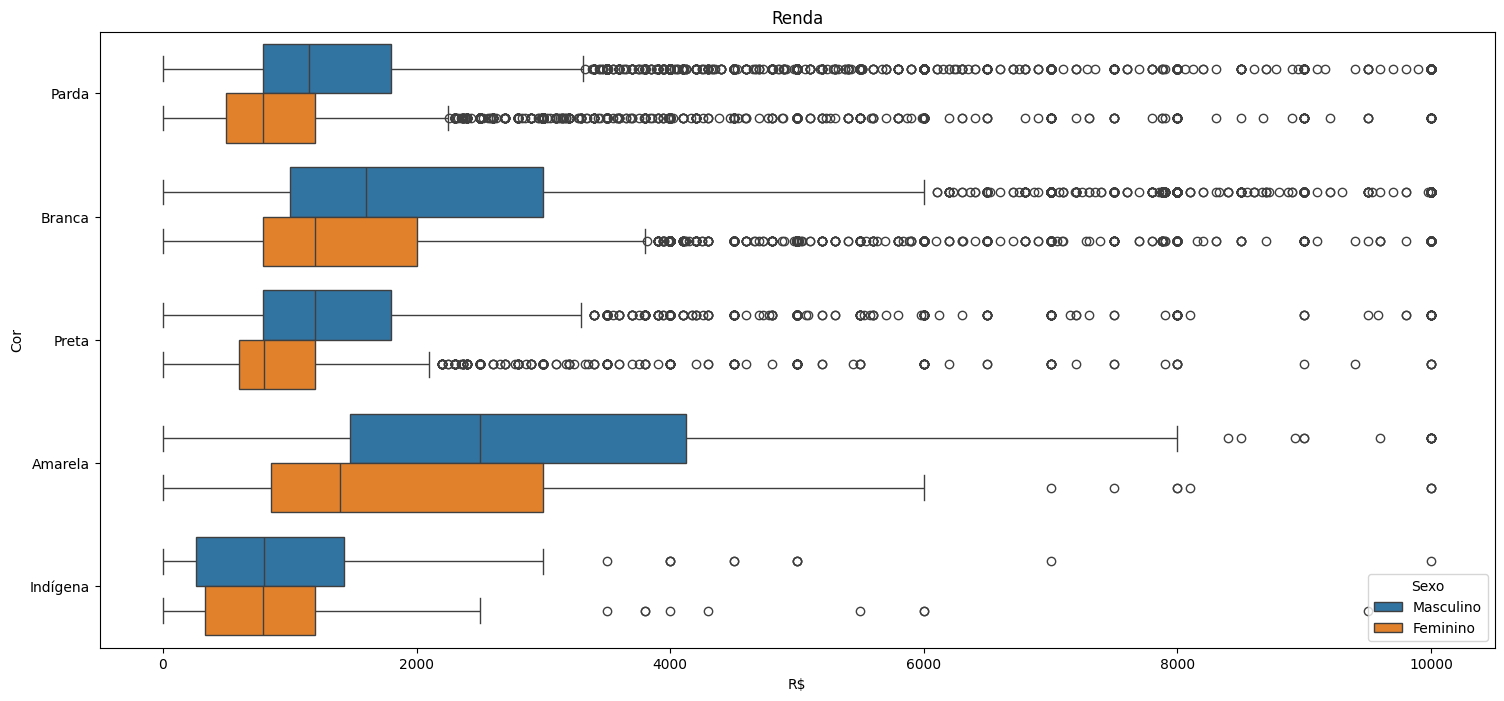

In [396]:
df_renda_10k = df[df['Renda'] <= 10000]

## para trocar os números pela sua correspondência do dicionário
df_renda_10k['Cor']= df_renda_10k['Cor'].map(cor)  
df_renda_10k['Sexo']= df_renda_10k['Sexo'].map(sexo)

box_plot = sns.boxplot(
    data = df_renda_10k, 
    x = 'Renda',
    y = 'Cor', 
    hue = 'Sexo',
    orient= 'h')

box_plot.figure.set_size_inches(18,8)
box_plot.set(title='Renda')
box_plot.set_xlabel('R$')
box_plot.set

> ### Conclusões

Quanto a diferença entre sexo, percebe-se a mediana deslocada para a direita no sexo masculino em todas as raças, indicando que os homens possuem uma renda maior que as mulheres.
A cor índigena apresenta sua mediana deslocada para esquerda quando comparada com as outras cores, mostrando que sua renda é menor. 
A cor amarela apresenta a maior dispersão de dados, e também a maior discrepância entre homens e mulheres, indicando que podem haver mais fatores que podem afetar a variável renda além desses analisados (cor e sexo).

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [397]:
from scipy import stats

stats.percentileofscore(df['Renda'],788)

np.float64(24.390942217595)

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [398]:
df['Renda'].quantile(0.99)

np.float64(15000.0)

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [399]:
df_ano_sexo = pd.crosstab(
    df['Anos de Estudo'],
    df['Sexo'],
    aggfunc = ['mean','median','max','std'],
    values = df['Renda']
)
df_ano_sexo.rename(columns = sexo, inplace = True)
df_ano_sexo.rename(index=anos_de_estudo,inplace=True)


df_ano_sexo

mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748     700.0    390.0   
1 ano                            895.629047   492.771987     788.0    400.0   
2 anos                           931.178986   529.911638     788.0    450.0   
3 anos                          1109.203862   546.853916     800.0    500.0   
4 anos                          1302.329283   704.279111    1000.0    788.0   
5 anos                          1338.653218   781.389776    1045.0    788.0   
6 anos                          1448.875419   833.732824    1200.0    788.0   
7 anos                          1465.497940   830.751004    1200.0    788.0   
8 anos                          1639.396667   933.615351    1300.0    800.0   
9 anos                          1508.038850   868.021700    1200.0    788.0   
10 anos                         1731.270847   925.919225    1218.0    800.0   
11 anos                         2117.060504  1286.790889    1500.0   1000.0   
12 anos                         2470.330776  1682.313725    1800.0   1200.0   
13 anos                         3195.099154  1911.730047    2400.0   1300.0   
14 anos                         3706.620269  2226.460457    2500.0   1600.0   
15 anos ou mais                 6134.279790  3899.513231    4000.0   2800.0   
Não determinados                1295.761905   798.174419    1200.0    788.0   

                                     max                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     30000    10000  1023.904884   639.311534  
1 ano                              30000     2000  1331.950552   425.291842  
2 anos                             40000     4000  1435.173827   498.234168  
3 anos                             80000     3500  2143.800133   424.124446  
4 anos                             50000    10000  1419.821787   629.553397  
5 anos                             35000     8000  1484.650587   635.782641  
6 anos                             25000     6000  1476.628602   574.547028  
7 anos                             40000     9000  1419.708673   602.038029  
8 anos                             30000    18000  1515.583715   896.781213  
9 anos                             60000    20000  2137.664774   973.221652  
10 anos                            45000     6000  2078.609734   620.611907  
11 anos                           200000   100000  2676.538942  1819.040417  
12 anos                            30000   120000  2268.081538  4851.833513  
13 anos                            25000    20000  2797.116800  2053.789771  
14 anos                            50000    20000  3987.214974  2064.083336  
15 anos ou mais                   200000   100000  7447.613594  4212.770709  
Não determinados                    7000     3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\650346225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_renda['Sexo']= df_filtrado_renda['Sexo'].map(sexo)


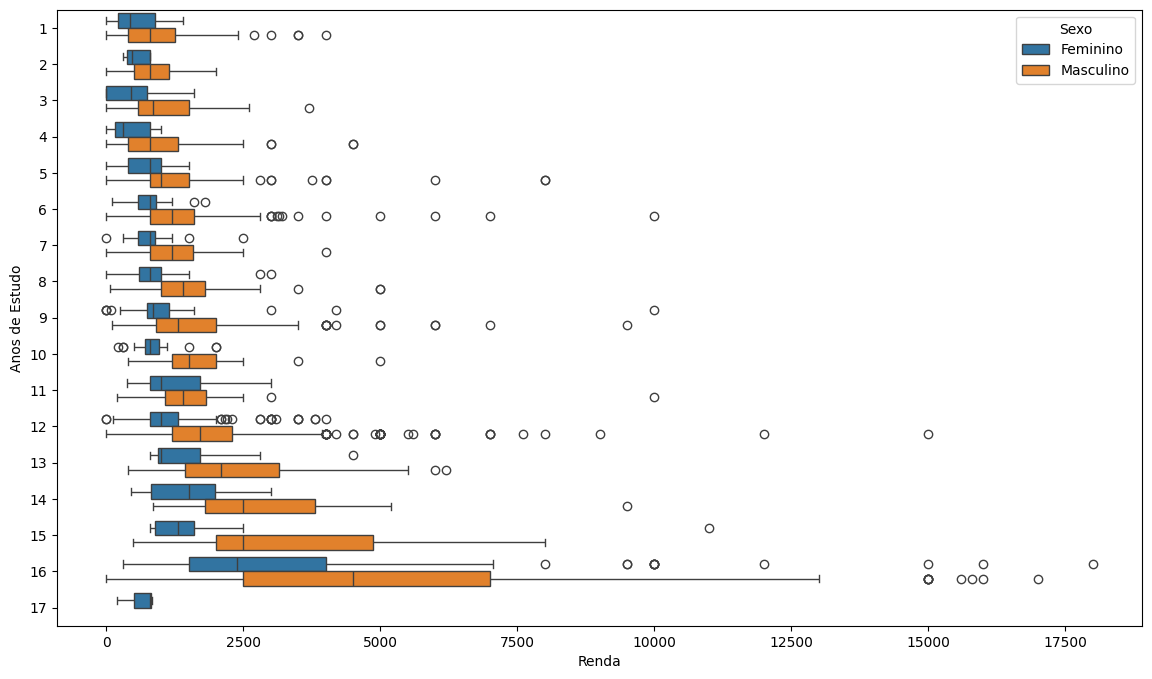

In [400]:
df_filtrado_renda['Sexo']= df_filtrado_renda['Sexo'].map(sexo)

box_plot_anos_estudo_renda = sns.boxplot(
    data = df_filtrado_renda.query('Idade == 40'),
    x = 'Renda',
    y = 'Anos de Estudo',
    hue = 'Sexo',
    orient= 'h'
)

box_plot_anos_estudo_renda.figure.set_size_inches(14,8)

In [401]:
df_filtrado_renda['Faixa_Idade'] = pd.cut(
        data = df_filtrado_renda['Idade'], 
        bins=10,
        include_lowest=True)

box_plot_anos_estudo_renda = sns.boxplot(
    data = df_filtrado_renda,
    x = 'Renda',
    y = 'Faixa_Idade',
    orient= 'h'
)

box_plot_anos_estudo_renda.figure.set_size_inches(14,8)

TypeError: cut() got an unexpected keyword argument 'data'

> ### Conclusões

Percebe-se que pessoas que tem um nível de estudo até os 5 anos, possuem uma renda média e distribuição parecidas, que se mostram menores que as rendas das pessoas que possuem um nível de estudo entre 6 e 11 anos. De 12 anos pra frente, aparenta-se que cada ano a mais de estudo representa um aumento significativo na renda das pessoas. Novamente, a renda das mulheres se mostra expressivamente menor que a dos homens quando comparado com aqueles que possuem o mesmo nível de estudo.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [360]:
renda_uf = df.groupby(['UF']).agg({'Renda': ['mean','median','max','std']})
renda_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_20704\3722130702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renda_10k['UF'] = df_renda_10k['UF'].map(uf)


[Text(0.5, 1.0, 'Box Plot da Renda')]

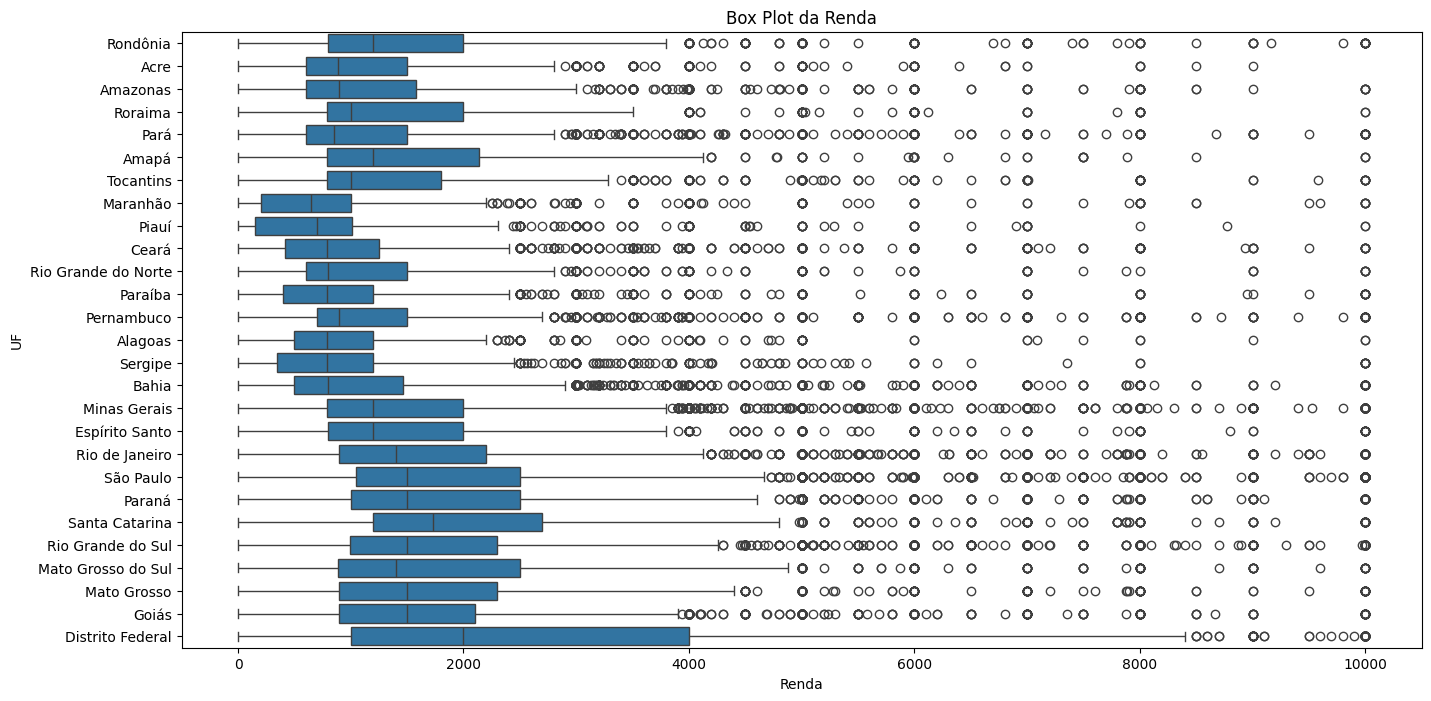

In [402]:
df_renda_10k['UF'] = df_renda_10k['UF'].map(uf)

boxplot_uf = sns.boxplot(
    data = df_renda_10k,
    x = 'Renda',
    y = 'UF',
    orient= 'h'
)

boxplot_uf.figure.set_size_inches(16,8)
boxplot_uf.set(title = 'Box Plot da Renda')

> ### Conclusões
O Distrito Federal possui uma das maiores rendas e também a maior dispersão dos dados, enquanto o Maranhão e o Piauí possuem as menores rendas quando comparadas com o resto do país.
